In [16]:
# Імпорт бібліотек
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
# Визначення кількості зразків
n_samples = 100

# Створення випадкових даних
data = {
    "unemployment_rate": np.random.uniform(5, 15, n_samples),  # 5% - 15%
    "average_income": np.random.uniform(10000, 50000, n_samples),  # 10,000 - 50,000 грн
    "life_expectancy": np.random.uniform(60, 85, n_samples),  # 60 - 85 років
    "consumer_price_index": np.random.uniform(95, 105, n_samples),  # 95 - 105
    "poverty_rate": np.random.uniform(5, 30, n_samples),  # 5% - 30%
    "population": np.random.randint(500, 10000, n_samples)  # 500 - 10,000 тис.
}

# Створення DataFrame
df = pd.DataFrame(data)

## Підготовка даних

Визначимо незалежні змінні та цільову змінну для моделювання.

In [18]:
# Припустимо, що ми хочемо передбачити "average_income" (середній дохід)
X = df.drop("average_income", axis=1)  # незалежні змінні
y = df["average_income"]  # цільова змінна

# Розділення даних на навчальну та тестову вибірки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Модель лінійної регресії

Тепер ми будемо використовувати модель лінійної регресії для прогнозування.

In [19]:
# Модель лінійної регресії
mod = LinearRegression()
mod.fit(X_train, y_train)
predictions = mod.predict(X_test)
print("Лінійна регресія - перші три прогнози:", predictions[:3])  # Показати перші три прогнози

Лінійна регресія - перші три прогнози: [28804.94624852 29137.00740374 30321.15169627]


## Модель K-найближчих сусідів

Далі ми спробуємо модель K-найближчих сусідів.

In [20]:
# Модель K-найближчих сусідів
mod_knn = KNeighborsRegressor()
mod_knn.fit(X_train, y_train)
knn_predictions = mod_knn.predict(X_test)
print("KNN - перші три прогнози:", knn_predictions[:3])  # Показати перші три прогнози

KNN - перші три прогнози: [27058.98487863 31403.87709524 26494.91947553]


## Модель дерева рішень

Спробуємо також модель дерева рішень для прогнозування.

In [21]:
# Модель дерева рішень
mod_tree = DecisionTreeRegressor()
mod_tree.fit(X_train, y_train)
tree_predictions = mod_tree.predict(X_test)
print("Дерево рішень - перші три прогнози:", tree_predictions[:3])  # Показати перші три прогнози

Дерево рішень - перші три прогнози: [22486.42284406 44270.63731223 11639.66980241]


## Модель випадкового лісу

Тепер спробуємо модель випадкового лісу.

In [22]:
# Модель випадкового лісу
mod_rf = RandomForestRegressor()
mod_rf.fit(X_train, y_train)
rf_predictions = mod_rf.predict(X_test)
print("Випадковий ліс - перші три прогнози:", rf_predictions[:3])  # Показати перші три прогнози

Випадковий ліс - перші три прогнози: [27706.5002153  29137.39724179 27025.34462779]


## Візуалізація результатів

Візуалізуємо результати прогнозів усіх моделей.

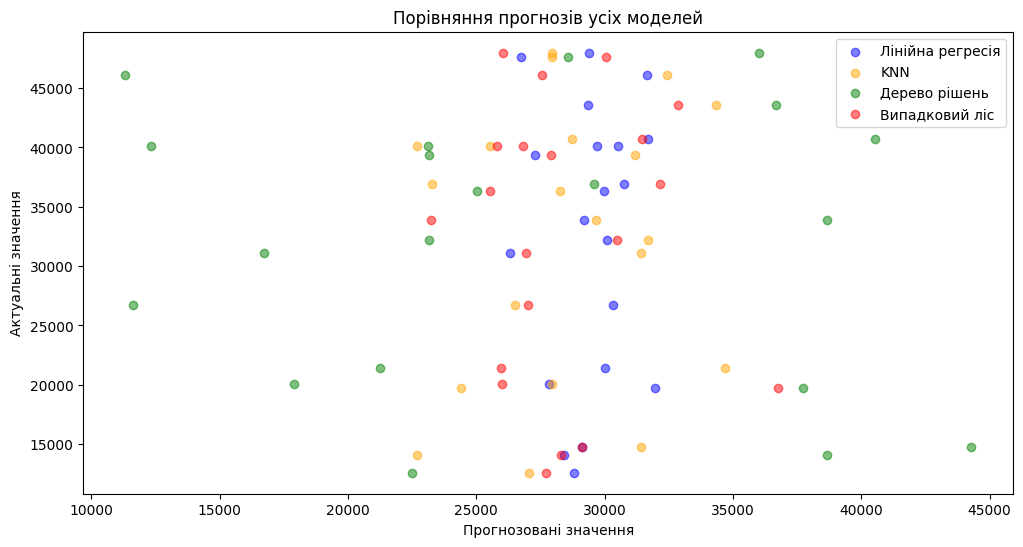

In [23]:
# Візуалізація результатів
plt.figure(figsize=(12, 6))
plt.scatter(predictions, y_test, label='Лінійна регресія', color='blue', alpha=0.5)
plt.scatter(knn_predictions, y_test, label='KNN', color='orange', alpha=0.5)
plt.scatter(tree_predictions, y_test, label='Дерево рішень', color='green', alpha=0.5)
plt.scatter(rf_predictions, y_test, label='Випадковий ліс', color='red', alpha=0.5)
plt.xlabel('Прогнозовані значення')
plt.ylabel('Актуальні значення')
plt.title('Порівняння прогнозів усіх моделей')
plt.legend()
plt.show()

## Пайплайн для моделі KNN

Тепер створимо пайплайн для моделі K-найближчих сусідів з нормалізацією даних.

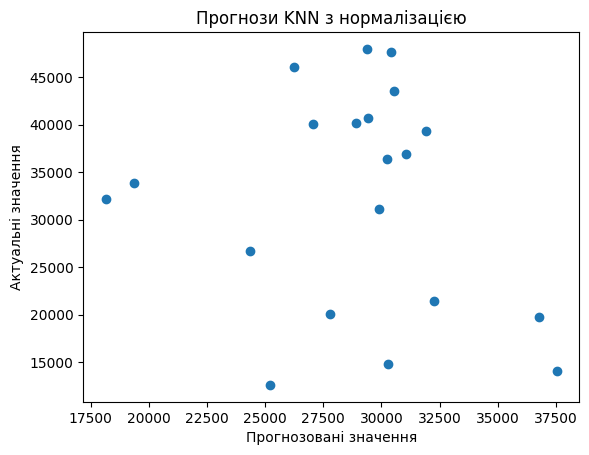

In [24]:
# Пайплайн
pipe = Pipeline([
    ("scale", StandardScaler()),
    ("model", KNeighborsRegressor())
])
pred = pipe.fit(X_train, y_train).predict(X_test)
plt.scatter(pred, y_test)
plt.xlabel('Прогнозовані значення')
plt.ylabel('Актуальні значення')
plt.title('Прогнози KNN з нормалізацією')
plt.show()

## Грид-серч для оптимізації параметрів

Використаємо грид-серч для оптимізації кількості сусідів у моделі KNN.

In [25]:
# Грид-серч
mod_grid = GridSearchCV(estimator=pipe,
                        param_grid={'model__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
                        cv=3)
mod_grid.fit(X_train, y_train)
print(pd.DataFrame(mod_grid.cv_results_))

# Найкращі параметри
print(f"Найкращі параметри KNN: {mod_grid.best_params_}")

   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.002287  4.006867e-04         0.001084    1.156095e-04   
1       0.001667  4.714266e-04         0.001334    4.714828e-04   
2       0.001667  4.713142e-04         0.001334    4.718761e-04   
3       0.002000  1.123916e-07         0.001334    4.714266e-04   
4       0.001667  4.715390e-04         0.001334    4.716513e-04   
5       0.001667  4.713142e-04         0.001334    4.714266e-04   
6       0.002000  1.123916e-07         0.001000    2.973602e-07   
7       0.002000  1.123916e-07         0.001000    1.946680e-07   
8       0.002002  2.642995e-06         0.000998    2.755314e-06   
9       0.002000  1.123916e-07         0.001000    1.123916e-07   

   param_model__n_neighbors                      params  split0_test_score  \
0                         1   {'model__n_neighbors': 1}          -1.686156   
1                         2   {'model__n_neighbors': 2}          -0.750353   
2                         3 

## Оцінка моделей

Оцінюємо середню квадратичну похибку (MSE) для всіх моделей.

In [26]:
# Функція для обчислення MSE
def calculate_mse(true_values, predictions):
    return np.mean((true_values - predictions) ** 2)

# Обчислюємо MSE для кожної моделі
mse_linear = calculate_mse(y_test, predictions)
mse_knn = calculate_mse(y_test, knn_predictions)
mse_tree = calculate_mse(y_test, tree_predictions)
mse_rf = calculate_mse(y_test, rf_predictions)

print(f"Середня квадратична похибка (Лінійна регресія): {mse_linear:.2f}")
print(f"Середня квадратична похибка (KNN): {mse_knn:.2f}")
print(f"Середня квадратична похибка (Дерево рішень): {mse_tree:.2f}")
print(f"Середня квадратична похибка (Випадковий ліс): {mse_rf:.2f}")

Середня квадратична похибка (Лінійна регресія): 136016700.10
Середня квадратична похибка (KNN): 143775177.84
Середня квадратична похибка (Дерево рішень): 285395153.74
Середня квадратична похибка (Випадковий ліс): 155171377.41
